In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
#맷플롯립 한글 설정

font_path = r'C:\Users\user\Desktop\경진대회\NanumFontSetup_TTF_ALL'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [3]:
import pandas as pd
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [4]:
data = pd.read_csv(r'C:\Users\user\Desktop\경진대회\금융보안원_경진대회_데이터(최종제출).csv')
data

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519292,202103,20,여가/스포츠,2013,여행,여성,30대,1인가구,서울특별시,영등포구,영등포동7가,1411368,7
519293,202103,21,e상품/서비스,2110,o2o서비스,남성,30대,1인가구,서울특별시,영등포구,영등포동7가,1386040,63
519294,202103,11,패션잡화,1113,시계/주얼리,여성,30대,신혼영유아가구,서울특별시,영등포구,영등포동7가,390818,7
519295,202103,16,식품,1610,가공식품,남성,40대,초중고자녀가구,서울특별시,영등포구,영등포동7가,327592,7


In [6]:
#매출금액 단위 만원으로 변환 
data['매출금액'] = data['매출금액']/10000
data.rename(columns={'매출금액' : '매출금액(단위:만원)'}, inplace=True)
#매출 건수 한 건당 매출금액 컬럼 추가
data['건당 매출금액(단위:만원)'] = data['매출금액(단위:만원)']/data['매출건수']
data

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액(단위:만원),매출건수,건당 매출금액(단위:만원)
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,78.2521,13,6.019392
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,96.3789,29,3.323410
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,92.4309,46,2.009367
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,108.9360,54,2.017333
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,165.6740,58,2.856448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519292,202103,20,여가/스포츠,2013,여행,여성,30대,1인가구,서울특별시,영등포구,영등포동7가,141.1368,7,20.162400
519293,202103,21,e상품/서비스,2110,o2o서비스,남성,30대,1인가구,서울특별시,영등포구,영등포동7가,138.6040,63,2.200063
519294,202103,11,패션잡화,1113,시계/주얼리,여성,30대,신혼영유아가구,서울특별시,영등포구,영등포동7가,39.0818,7,5.583114
519295,202103,16,식품,1610,가공식품,남성,40대,초중고자녀가구,서울특별시,영등포구,영등포동7가,32.7592,7,4.679886


In [7]:
data_f = data[data['품목대분류명'] == '식품']
data_f

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액(단위:만원),매출건수,건당 매출금액(단위:만원)
19,201903,16,식품,1610,가공식품,여성,40대,초중고자녀가구,서울특별시,강동구,길동,140.9005,63,2.236516
37,201903,16,식품,1612,음료,여성,40대,초중고자녀가구,서울특별시,광진구,능동,52.9976,25,2.119904
39,201903,16,식품,1612,음료,여성,50대,초중고자녀가구,서울특별시,양천구,목동,27.1694,8,3.396175
57,201903,16,식품,1612,음료,여성,40대,신혼영유아가구,서울특별시,양천구,목동,105.6129,38,2.779287
60,201903,16,식품,1610,가공식품,남성,50대,성인자녀가구,서울특별시,양천구,목동,123.9736,42,2.951752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519267,202103,16,식품,1610,가공식품,남성,40대,성인자녀가구,서울특별시,용산구,원효로1가,14.5683,9,1.618700
519272,202103,16,식품,1612,음료,여성,50대,성인자녀가구,서울특별시,용산구,청파동1가,36.4479,7,5.206843
519274,202103,16,식품,1610,가공식품,여성,30대,1인가구,서울특별시,용산구,청파동2가,169.3750,7,24.196429
519275,202103,16,식품,1610,가공식품,여성,20대,1인가구,서울특별시,용산구,청파동3가,29.6732,9,3.297022


In [9]:
data_f['성별'].value_counts()

여성    39758
남성    25237
Name: 성별, dtype: int64

In [11]:
data_f['성별'].groupby(data_f['품목중분류명']).value_counts()

품목중분류명   성별
가공식품     여성    13257
         남성     8381
신선/요리재료  여성    14664
         남성     9377
음료       여성    11837
         남성     7479
Name: 성별, dtype: int64

In [12]:
data_df = pd.DataFrame(data_f)

In [18]:
#월별 barplot
def get_barplot_C_M(category):
    dfLC = data_df[['기준년월', '품목대분류명','품목중분류명','매출건수']]
    dfLC_bar = dfLC[dfLC['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    sns.barplot(x = '품목중분류명', y = '매출건수', hue = '기준년월', data = dfLC_bar, edgecolor = 'black')

def get_barplot_M_M(category):
    dfLM = data_df[['기준년월', '품목대분류명','품목중분류명','매출금액(단위:만원)']]
    dfLM_bar = dfLM[dfLM['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    sns.barplot(x = '품목중분류명', y = '매출금액(단위:만원)', hue = '기준년월', data = dfLM_bar, edgecolor = 'black')

In [16]:
#성별 barplot
def get_barplot_C_S(category):
    dfLC = data_df[['기준년월', '품목대분류명', '성별','품목중분류명','매출건수']]
    dfLC_bar = dfLC[dfLC['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    sns.barplot(x = '품목중분류명', y = '매출건수', hue = '성별', data = dfLC_bar, edgecolor = 'black')

def get_barplot_M_S(category):
    dfLM = data_df[['기준년월', '품목대분류명','성별','품목중분류명','매출금액(단위:만원)']]
    dfLM_bar = dfLM[dfLM['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    sns.barplot(x = '품목중분류명', y = '매출금액(단위:만원)', hue = '성별', data = dfLM_bar, edgecolor = 'black')

def get_barplot_CM_S(category):
    dfCM = data_df[['기준년월', '품목대분류명', '품목중분류명', '성별', '건당 매출금액(단위:만원)']]
    dfCM_bar = dfCM[dfCM['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    sns.barplot(x = '품목중분류명', y = '건당 매출금액(단위:만원)', hue = '성별', data = dfCM_bar, edgecolor = 'black')

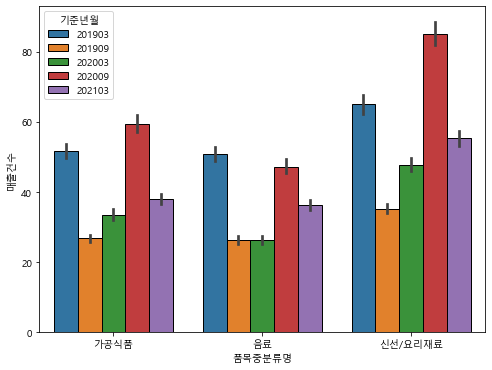

In [14]:
get_barplot_C_M('식품')

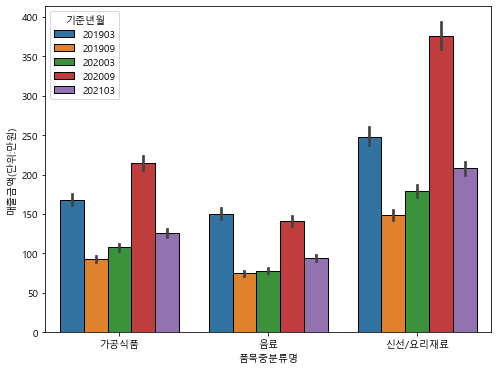

In [15]:
get_barplot_M_M('식품')

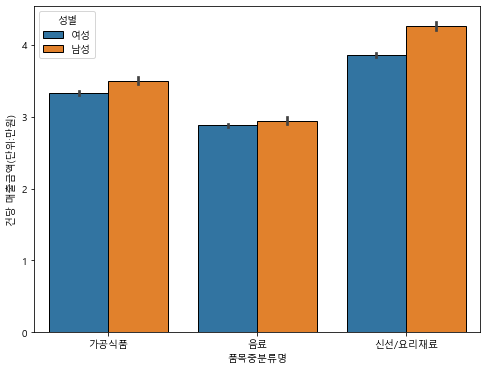

In [17]:
get_barplot_CM_S('식품')

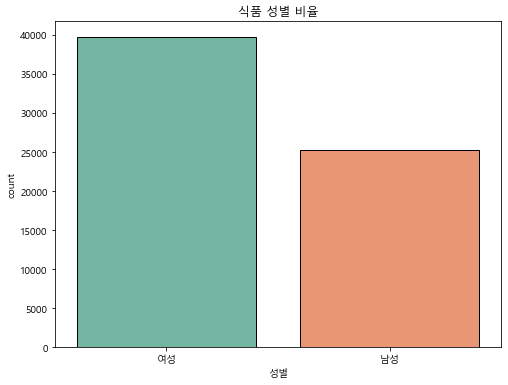

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
sns.countplot(x = '성별', data = data_f, edgecolor= 'black', palette='Set2')
ax.set_title('식품 성별 비율')
plt.show()

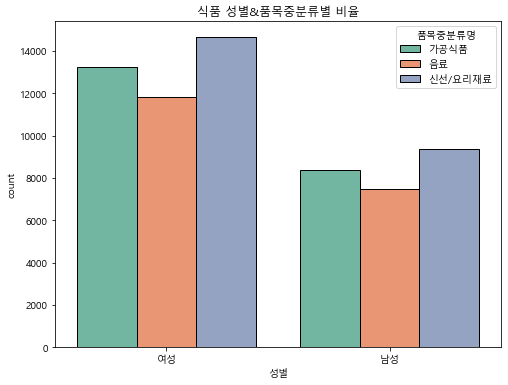

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
sns.countplot(x = '성별', data = data_f, edgecolor= 'black', palette='Set2', hue = '품목중분류명')
ax.set_title('식품 성별&품목중분류별 비율')
plt.show()


C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


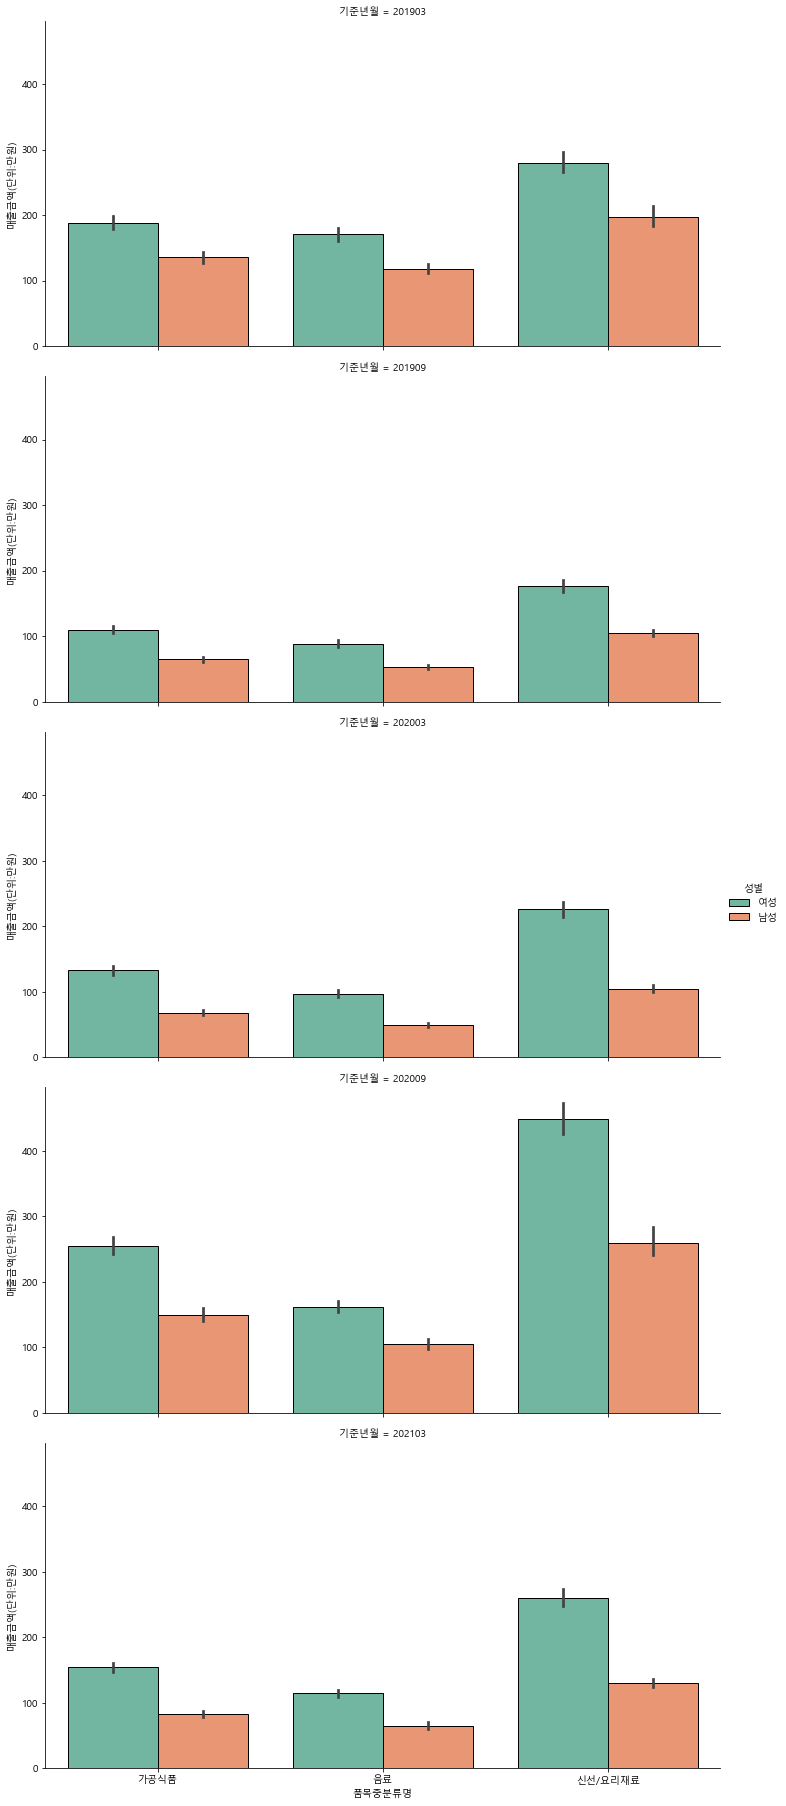

In [22]:
sns.factorplot(x = '품목중분류명',y = '매출금액(단위:만원)', data = data_f, edgecolor= 'black', palette='Set2', hue = '성별', row = '기준년월', kind = 'bar', aspect = 2)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


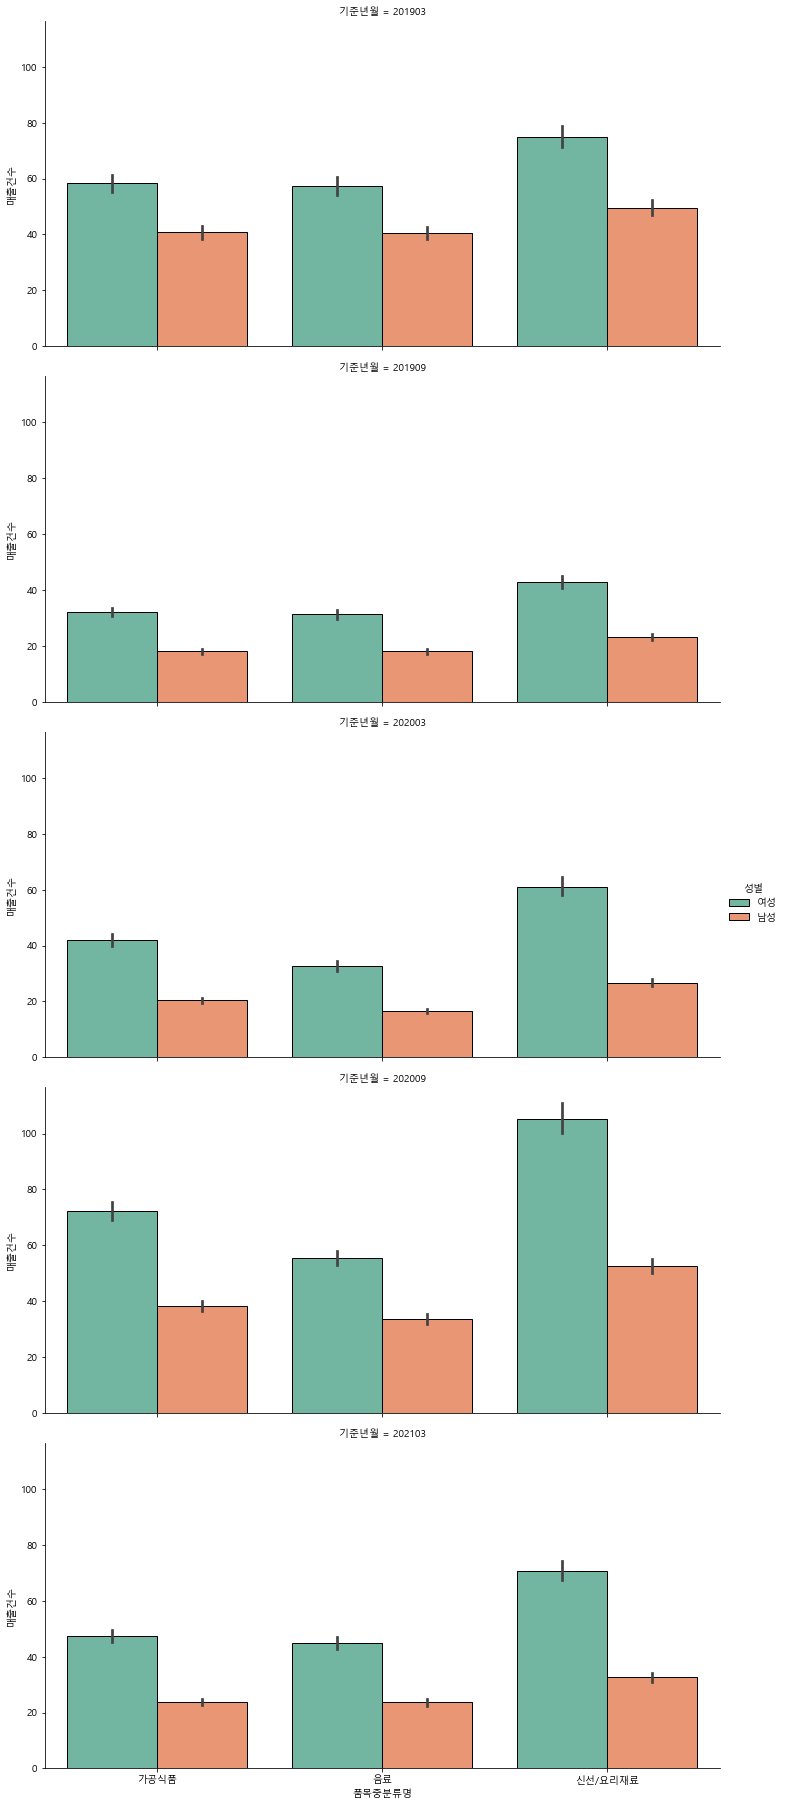

In [24]:
sns.factorplot(x = '품목중분류명',y = '매출건수', data = data_f, edgecolor= 'black', palette='Set2', hue = '성별', row = '기준년월', kind = 'bar', aspect = 2)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


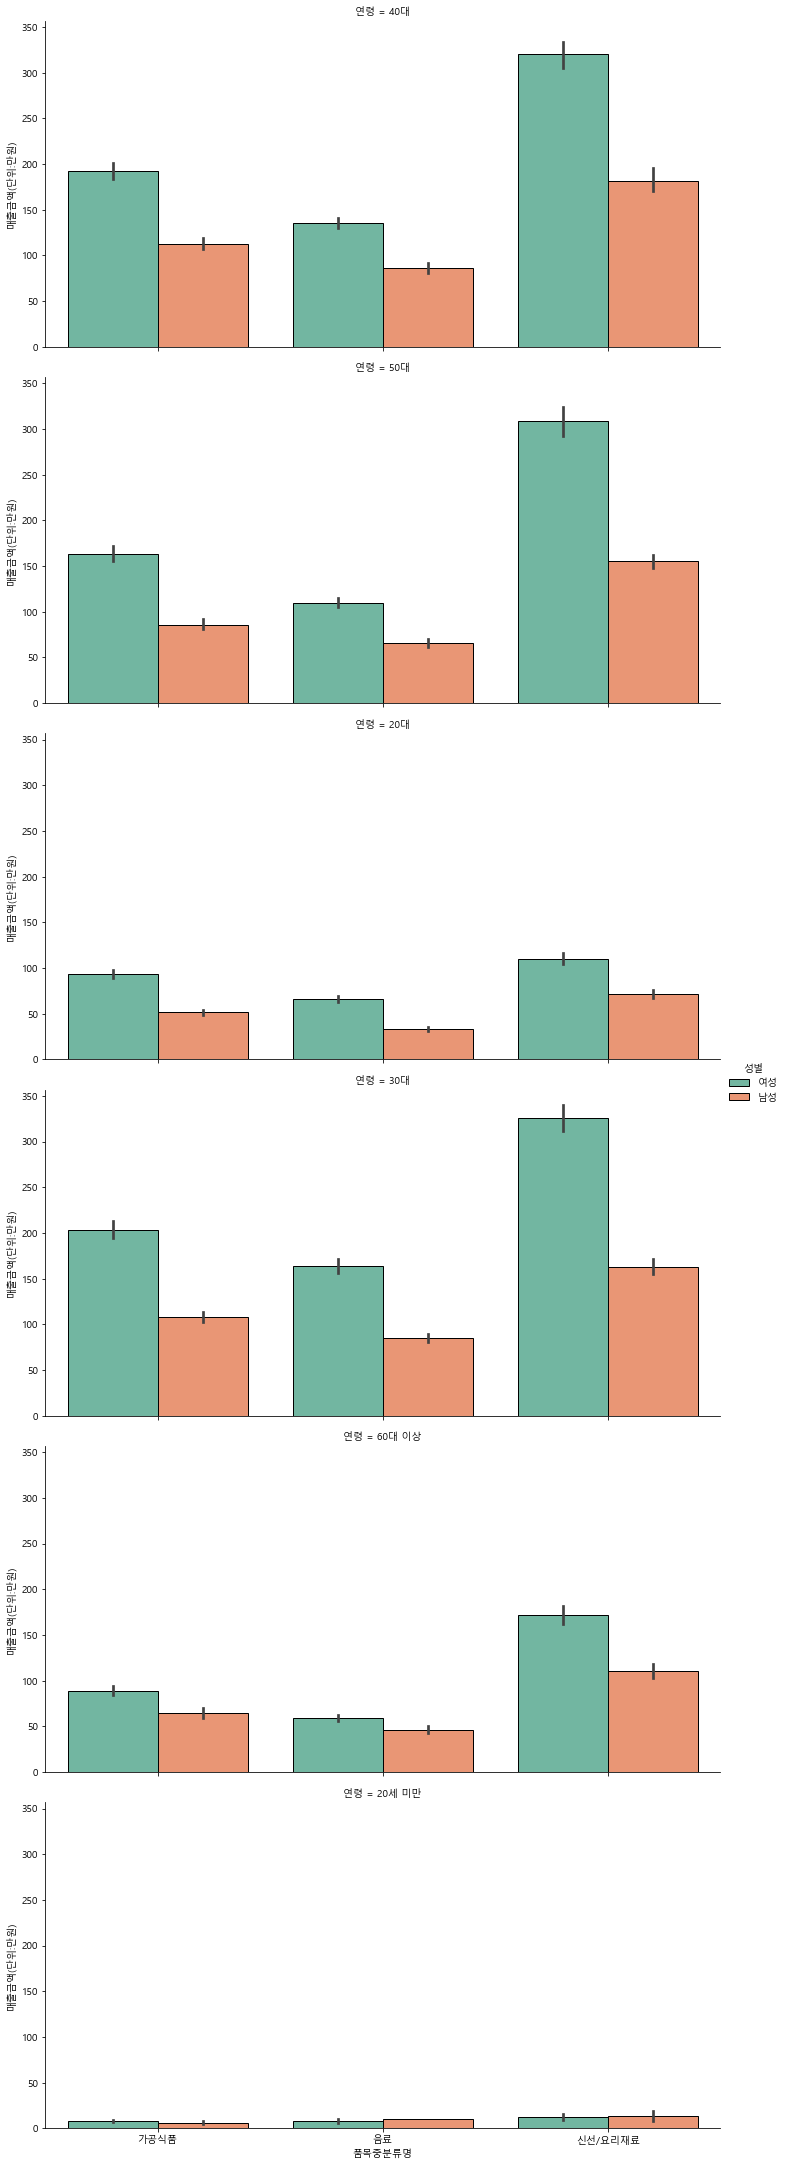

In [26]:
sns.factorplot(x = '품목중분류명',y = '매출금액(단위:만원)', data = data_f, edgecolor= 'black', palette='Set2', hue = '성별', row = '연령', kind = 'bar', aspect = 2)
plt.show()

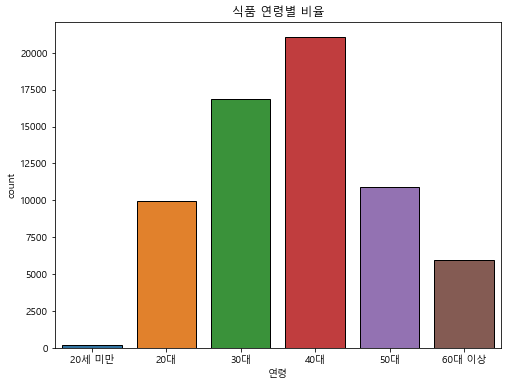

In [27]:
group_names = ['20세 미만', '20대', '30대', '40대', '50대', '60대 이상']
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
sns.countplot(x = '연령', data = data_f, edgecolor = 'black', order=group_names)
ax.set_title('식품 연령별 비율')
plt.show()

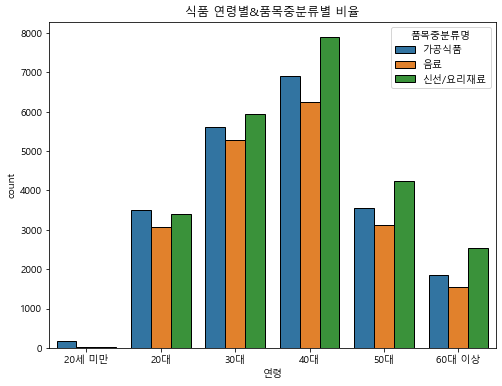

In [29]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
sns.countplot(x = '연령', data = data_f, edgecolor= 'black', hue = '품목중분류명', order=group_names)
ax.set_title('식품 연령별&품목중분류별 비율')
plt.show()

#20대에서 신선요리재료보다 가공식품의 소요가 더 많음

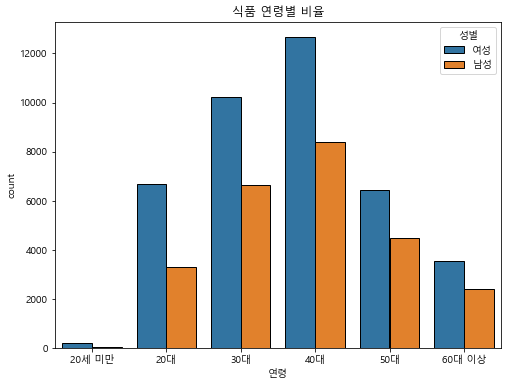

In [30]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
sns.countplot(x = '연령', data = data_f, hue = '성별', edgecolor = 'black', order=group_names)
ax.set_title('식품 연령별 비율')
plt.show()

In [32]:
data_f['고객소재지_광역시도'].value_counts()

서울특별시    38198
경기도      17972
인천광역시     8825
Name: 고객소재지_광역시도, dtype: int64

In [33]:
data_f['매출건수'].groupby(data_f['고객소재지_광역시도']).sum()

고객소재지_광역시도
경기도       698056
서울특별시    1810544
인천광역시     395727
Name: 매출건수, dtype: int64